<a href="https://colab.research.google.com/github/AdityaKumbhar21/Machine-Learning/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Implementation

### Univariate Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Now first we will create a basic data points to able to train to the model.

In [ ]:
x_train  = np.array([1.0,1.3,2,0.9])  # x train are the data points which indicates independent values, in our case the size of the house(in 1000 sq.ft).
y_train = np.array([300,350,500,280]) # y train are the data points which indicates the target values , in our case the price of the house(in 1000's).

In [ ]:
# defining the number of training examples i.e. m
m = len(x_train)
print(m)

4


Now we will plot our data on the scatter plot.

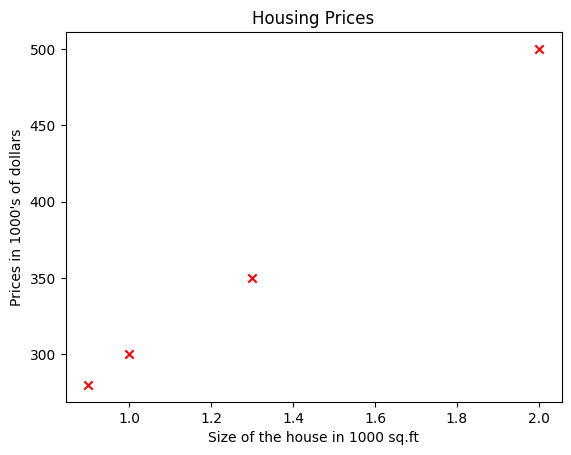

In [ ]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title("Housing Prices")
plt.ylabel("Prices in 1000's of dollars")
plt.xlabel("Size of the house in 1000 sq.ft")
plt.show()

As we know we need **w and b** parameters to create the best fit line so lets define them and initialize them with some value

In [ ]:
# let's take w and b 's initial value to 10
w = 200
b = 100
print(f"The parameters w,b = {w,b}")

The parameters w,b = (200, 100)


In [ ]:
# creating a function for predicting the actual value
def compute_model(x,w,b):
  m = len(x)
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w*x[i] + b
  return f_wb

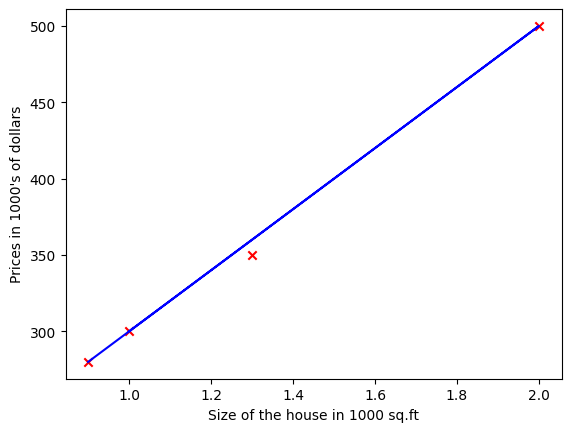

In [ ]:
# calling the compute_cost() method

tmp_f = compute_model(x_train,w,b)

# plotting the predictions made by our model

plt.plot(x_train, tmp_f, c = 'b', label='Our predictions')
plt.scatter(x_train, y_train, marker = 'x',c='r',label = 'Actual values')
plt.ylabel("Prices in 1000's of dollars")
plt.xlabel("Size of the house in 1000 sq.ft")
plt.show()

Now let's define the cost function

In [ ]:
def calculate_cost(x,y,w,b):
  m = len(x)
  sum_cost = 0
  for i in range(m):
    f_wb = w* x[i] + b
    cost = (f_wb - y[i]) ** 2
    sum_cost = sum_cost + cost

  total_cost = (1/(2*m)) * sum_cost

  return total_cost

Now let's implement gradient descent

In [ ]:
# defining the method of computing the partial derivatives J(w,b)

def compute_gradients(x,y,w,b):
  m = len(x)

# derivatives w.r.t the w and b
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = (f_wb - y[i])
    dj_dw += dj_dw_i # adding the sum of each ith data point in the org dj_dw
    dj_db += dj_db_i # adding the sum of each ith data point in the org dj_dw
  dj_dw = dj_dw/m # dividing the ebtire by m as per the formula
  dj_db = dj_db/m # dividing the ebtire by m as per the formula

  return dj_dw, dj_db


In [ ]:
# defining the gradient descent
import math
def gradient_descent(x,y,w_in,b_in ,alpha, iters, cost_function, calc_gradients):

  cost_history = []
  para_history = []
  w = w_in
  b = b_in

  for i in range(iters):
    dj_dw, dj_db = calc_gradients(x,y,w,b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    # saving the cost history
    cost_history.append(cost_function(x,y,w,b))
    para_history.append([w,b])

    if i% math.ceil(iters/10) == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, cost_history, para_history

In [ ]:
# initilze w and b
w_init = 0
b_init = 0

iterations = 10000
alpha = 0.01  # 1.0e-2 -> 0.01

w_final, b_final , cost_history, para_history = gradient_descent(x_train, y_train,w_init, b_init, alpha, iterations,calculate_cost, compute_gradients)

print(f"Final w: {w_final} and Final b: {b_final}")

Iteration    0: Cost 6.39e+04  dj_dw: -5.018e+02, dj_db: -3.575e+02   w:  5.018e+00, b: 3.57500e+00
Iteration 1000: Cost 2.18e+01  dj_dw: -7.463e-01, dj_db:  1.039e+00   w:  1.887e+02, b: 1.13261e+02
Iteration 2000: Cost 1.27e+01  dj_dw: -3.862e-01, dj_db:  5.375e-01   w:  1.941e+02, b: 1.05656e+02
Iteration 3000: Cost 1.03e+01  dj_dw: -1.999e-01, dj_db:  2.781e-01   w:  1.970e+02, b: 1.01721e+02
Iteration 4000: Cost 9.61e+00  dj_dw: -1.034e-01, dj_db:  1.439e-01   w:  1.984e+02, b: 9.96841e+01
Iteration 5000: Cost 9.44e+00  dj_dw: -5.352e-02, dj_db:  7.448e-02   w:  1.992e+02, b: 9.86302e+01
Iteration 6000: Cost 9.39e+00  dj_dw: -2.770e-02, dj_db:  3.854e-02   w:  1.996e+02, b: 9.80849e+01
Iteration 7000: Cost 9.38e+00  dj_dw: -1.433e-02, dj_db:  1.995e-02   w:  1.998e+02, b: 9.78027e+01
Iteration 8000: Cost 9.38e+00  dj_dw: -7.417e-03, dj_db:  1.032e-02   w:  1.999e+02, b: 9.76566e+01
Iteration 9000: Cost 9.38e+00  dj_dw: -3.838e-03, dj_db:  5.341e-03   w:  1.999e+02, b: 9.75810e+01


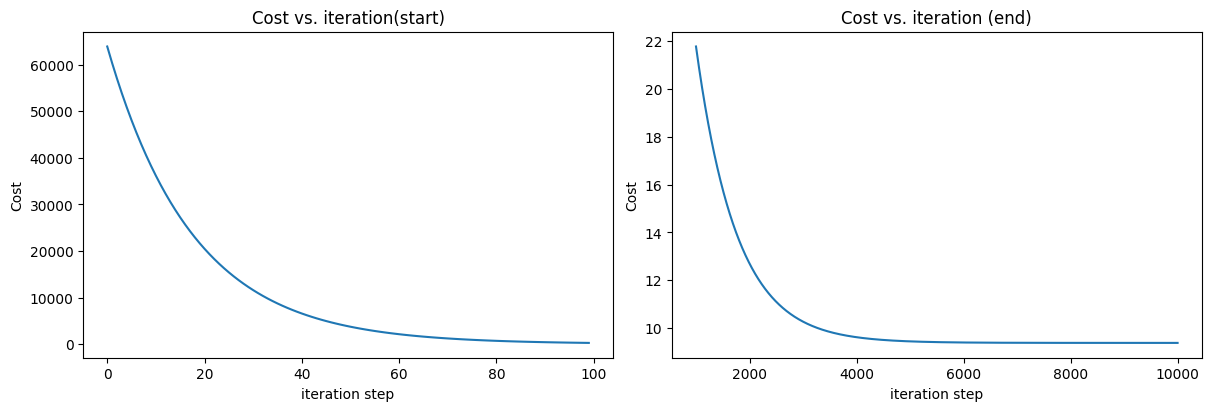

In [ ]:
# plotting the  cost vs iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

### Multiple Linear Regression

In [ ]:
# defining the data with multiple features
# features -> Size of house in sq.ft, number of bedrooms, number of floors, age of house
# target feature -> price of house in 1000's dollars
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(f"x_train: \n{x_train}\n y_train: {y_train}")

x_train: 
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
 y_train: [460 232 178]


In [ ]:
# in multiple linear regression, the parameter w is also a vector, which is being multiplied with each feature/row

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [ ]:
# model prediction

def predict(x,w,b):
  n = x.shape[0]
  f_wb = np.dot(x,w) + b
  return f_wb

In [ ]:
# let's make a prediction
X = x_train[0]

f_wb = predict(X,w_init, b_init)
print(f"The price predicted by model: ${f_wb}k ")

The price predicted by model: $459.9999976194083k 


In [ ]:
# computing cost for multiple variables

def comp_cost(x,y,w,b):
  m = len(x)
  cost = 0.0
  for i in range(m):
    f_wb = np.dot(x[i],w) + b
    cost = cost + (f_wb - y[i])**2
  cost = cost / (2*m)
  return cost

In [ ]:
cost = comp_cost(x_train, y_train, w_init, b_init)
print(cost)

1.5578904428966628e-12


In [ ]:
# calculating gradients
def comp_gradients(x,y,w,b):
  m,n = x.shape

  d_dwj = np.zeros((n,))
  d_dbj = 0

  for i in range(m):
    err = (np.dot(x[i],w) +b) - y[i]
    for j in range(n):
      d_dwj[j] = d_dwj[i] +  err * x[i,j]
    d_dbj = d_dbj + err

  d_dwj = d_dwj / m
  d_dbj = d_dbj / m

  return d_dwj, d_dbj

In [ ]:
tmp_dj_dw, tmp_dj_db= comp_gradients(x_train, y_train, w_init, b_init)
print(f'dj_dw at initial w,b: {tmp_dj_dw}')
print(f'dj_db at initial w,b: \n {tmp_dj_db}')

dj_dw at initial w,b: [-0.00196328 -0.00167695 -0.00167661 -0.0016884 ]
dj_db at initial w,b: 
 -1.6739251501955248e-06


In [ ]:
# implementing gradient descent
import math
def gradient_descent(x,y,w_in, b_in, cost_function, gradient_function, alpha, iters):

  w = w_in
  b = b_in
  cost_history = []


  for i in range(iters):
    dj_dw, dj_db = gradient_function(x,y,w,b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 100000:
      cost_history.append(cost_function(x,y,w,b))

    if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:8.2f}   ")

  return w, b, cost_history

In [ ]:
initial_w = np.zeros_like(w_init)
initial_b = 0

alpha = 5.0e-7
iters = 1000

w_final, b_final, cost_history = gradient_descent(x_train, y_train, initial_w, initial_b, comp_cost, comp_gradients,alpha, iters)

print(f"w,b found by gradient descent: {w_final}, {b_final}")

Iteration    0: Cost   855.69   
Iteration  100: Cost  1036.57   
Iteration  200: Cost  1080.96   
Iteration  300: Cost  1139.29   
Iteration  400: Cost  1216.69   
Iteration  500: Cost  1320.37   
Iteration  600: Cost  1460.62   
Iteration  700: Cost  1652.21   
Iteration  800: Cost  1916.40   
Iteration  900: Cost  2283.97   
w,b found by gradient descent: [0.10100132 4.45250479 4.4576242  4.27844465], -0.017296978980285725


In [ ]:
m = x_train.shape[0]

for i in range(m):
  print(f"Prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Prediction: 431.74, target value: 460
Prediction: 336.41, target value: 232
Prediction: 249.14, target value: 178


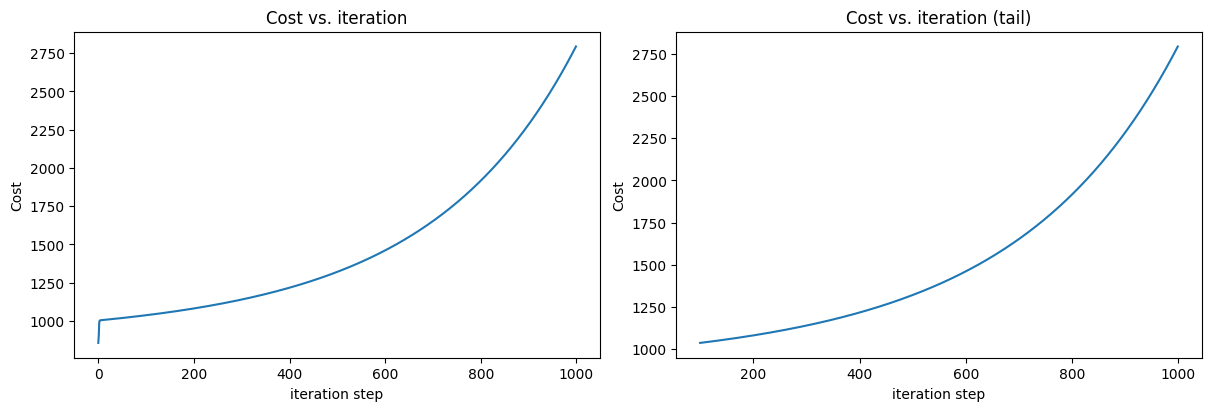

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history)
ax2.plot(100 + np.arange(len(cost_history[100:])), cost_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()